In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LassoCV, RidgeCV, ElasticNetCV
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
sns.set_theme(style = "darkgrid")
pd.set_option('display.float_format', '{:.3f}'.format)


In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,latitude_difference,longitude_difference,trip_distance,pickup_month,pickup_day,pickup_weekday,pickup_hour,pickup_minute,Temp.,Windchill,Humidity,Pressure,Dew Point,Visibility,Wind Dir,Wind Speed,Gust Speed,Precip,Conditions
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982,40.768,-73.965,40.766,N,455,-0.002,0.018,1.372,3,14,0,17,24,4.400,-0.500,0.860,1017.500,2.200,8.000,ENE,27.800,57.400,0.300,Overcast
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980,40.739,-73.999,40.731,N,663,-0.007,-0.019,1.829,6,12,6,0,43,28.900,NaN,0.530,1006.600,18.300,16.100,West,7.400,0.000,0.000,Unknown
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979,40.764,-74.005,40.710,N,2124,-0.054,-0.026,5.538,1,19,1,11,35,-6.700,-14.300,0.460,1016.300,-16.700,16.100,West,24.100,46.300,0.000,Clear
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010,40.720,-74.012,40.707,N,429,-0.013,-0.002,1.070,4,6,2,19,32,7.200,3.300,0.390,1019.100,-6.100,16.100,South,25.900,35.200,0.000,Clear
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973,40.793,-73.973,40.783,N,435,-0.011,0.000,0.747,3,26,5,13,30,9.400,NaN,0.460,1026.900,-1.700,16.100,Variable,9.300,0.000,0.000,Clear


In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'latitude_difference', 'longitude_difference',
       'trip_distance', 'pickup_month', 'pickup_day', 'pickup_weekday',
       'pickup_hour', 'pickup_minute', 'Temp.', 'Windchill', 'Humidity',
       'Pressure', 'Dew Point', 'Visibility', 'Wind Dir', 'Wind Speed',
       'Gust Speed', 'Precip', 'Conditions'],
      dtype='object')

In [3]:
df.drop(['id', 'vendor_id', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 
         'dropoff_latitude', 'latitude_difference', 'longitude_difference', 'pickup_month', 'pickup_day', 'pickup_weekday',
       'pickup_hour', 'pickup_minute'], axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 17 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   pickup_datetime     1458644 non-null  object 
 1   dropoff_datetime    1458644 non-null  object 
 2   passenger_count     1458644 non-null  int64  
 3   store_and_fwd_flag  1458644 non-null  object 
 4   trip_duration       1458644 non-null  int64  
 5   trip_distance       1458644 non-null  float64
 6   Temp.               1446612 non-null  float64
 7   Windchill           480744 non-null   float64
 8   Humidity            1446612 non-null  float64
 9   Pressure            1402613 non-null  float64
 10  Dew Point           1446612 non-null  float64
 11  Visibility          1402047 non-null  float64
 12  Wind Dir            1446612 non-null  object 
 13  Wind Speed          1446612 non-null  float64
 14  Gust Speed          1446612 non-null  float64
 15  Precip         

In [4]:
df.replace("Nan", np.nan, inplace = True)

In [ ]:
df.isna().sum()

pickup_datetime            0
dropoff_datetime           0
passenger_count            0
store_and_fwd_flag         0
trip_duration              0
trip_distance              0
Temp.                  12032
Windchill             977900
Humidity               12032
Pressure               56031
Dew Point              12032
Visibility             56597
Wind Dir               12032
Wind Speed             12032
Gust Speed             12032
Precip                 12032
Conditions             12032
dtype: int64

6it [01:54, 19.07s/it]


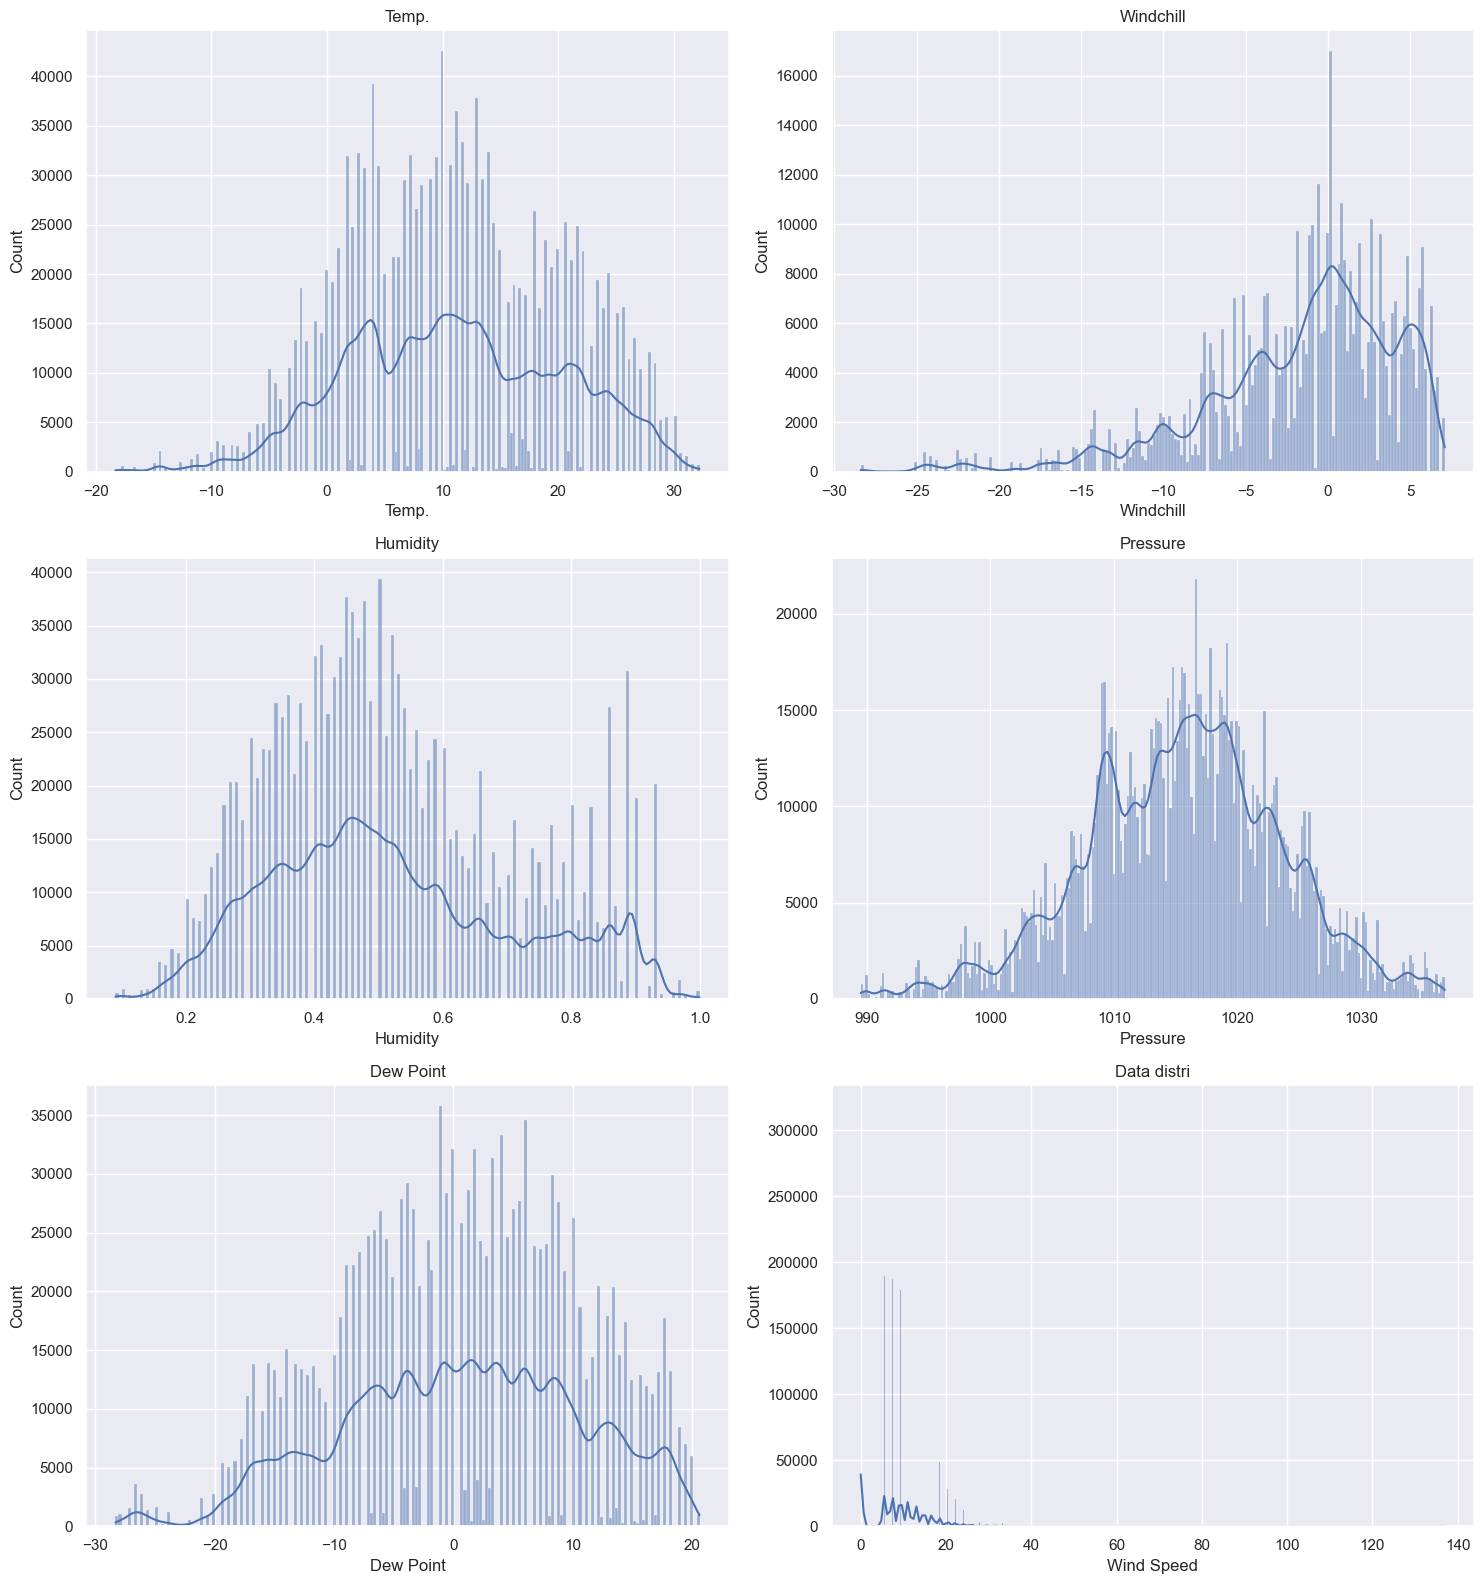

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 16))

axes = axes.flatten()

for i, column in tqdm(enumerate(['Temp.', 'Windchill', 'Humidity', 'Pressure', 'Dew Point', 'Wind Speed', ])):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.title("Numerical Data Distribution")
plt.tight_layout()
plt.show()

3it [00:41, 13.99s/it]


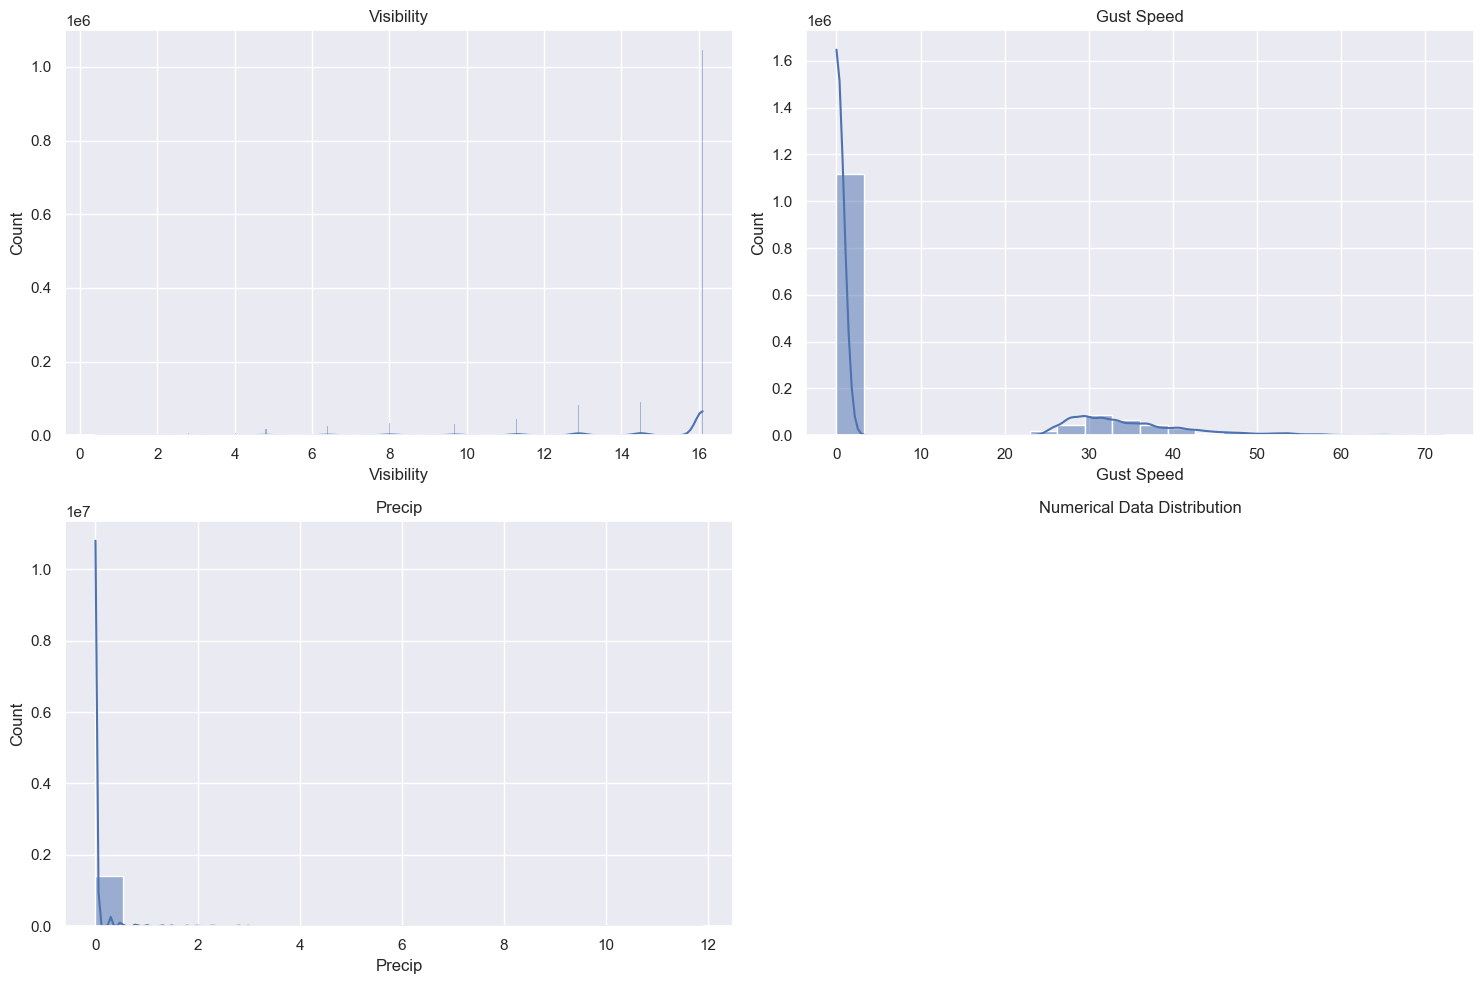

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes = axes.flatten()

for i, column in tqdm(enumerate(['Visibility','Gust Speed', 'Precip'])):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.title("Numerical Data Distribution")
axes[3].set_axis_off()
plt.tight_layout()
plt.show()

##### Observations:
###### - All numerical data are skewed
###### - There is a possibility of outliers in the dataset

2it [00:03,  1.69s/it]


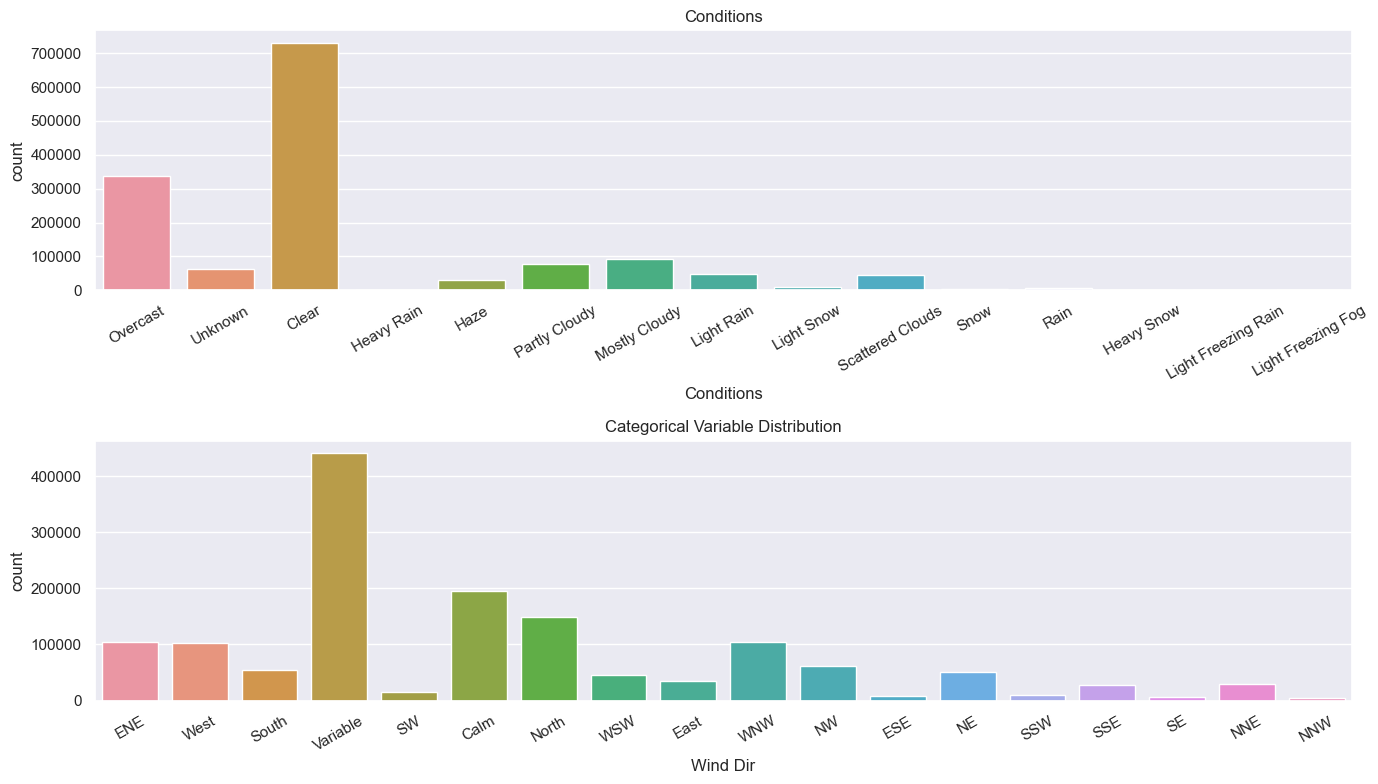

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8))

axes = axes.flatten()

for i, column in tqdm(enumerate(['Conditions', 'Wind Dir'])):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(column)
    axes[i].tick_params(axis='x', rotation=30)

plt.title("Categorical Variable Distribution")
plt.tight_layout()
plt.show()

 ##### Observations
 - ###### There are few categories in Conditions and wind dir which are very less frequently seen

8it [00:00,  8.42it/s]


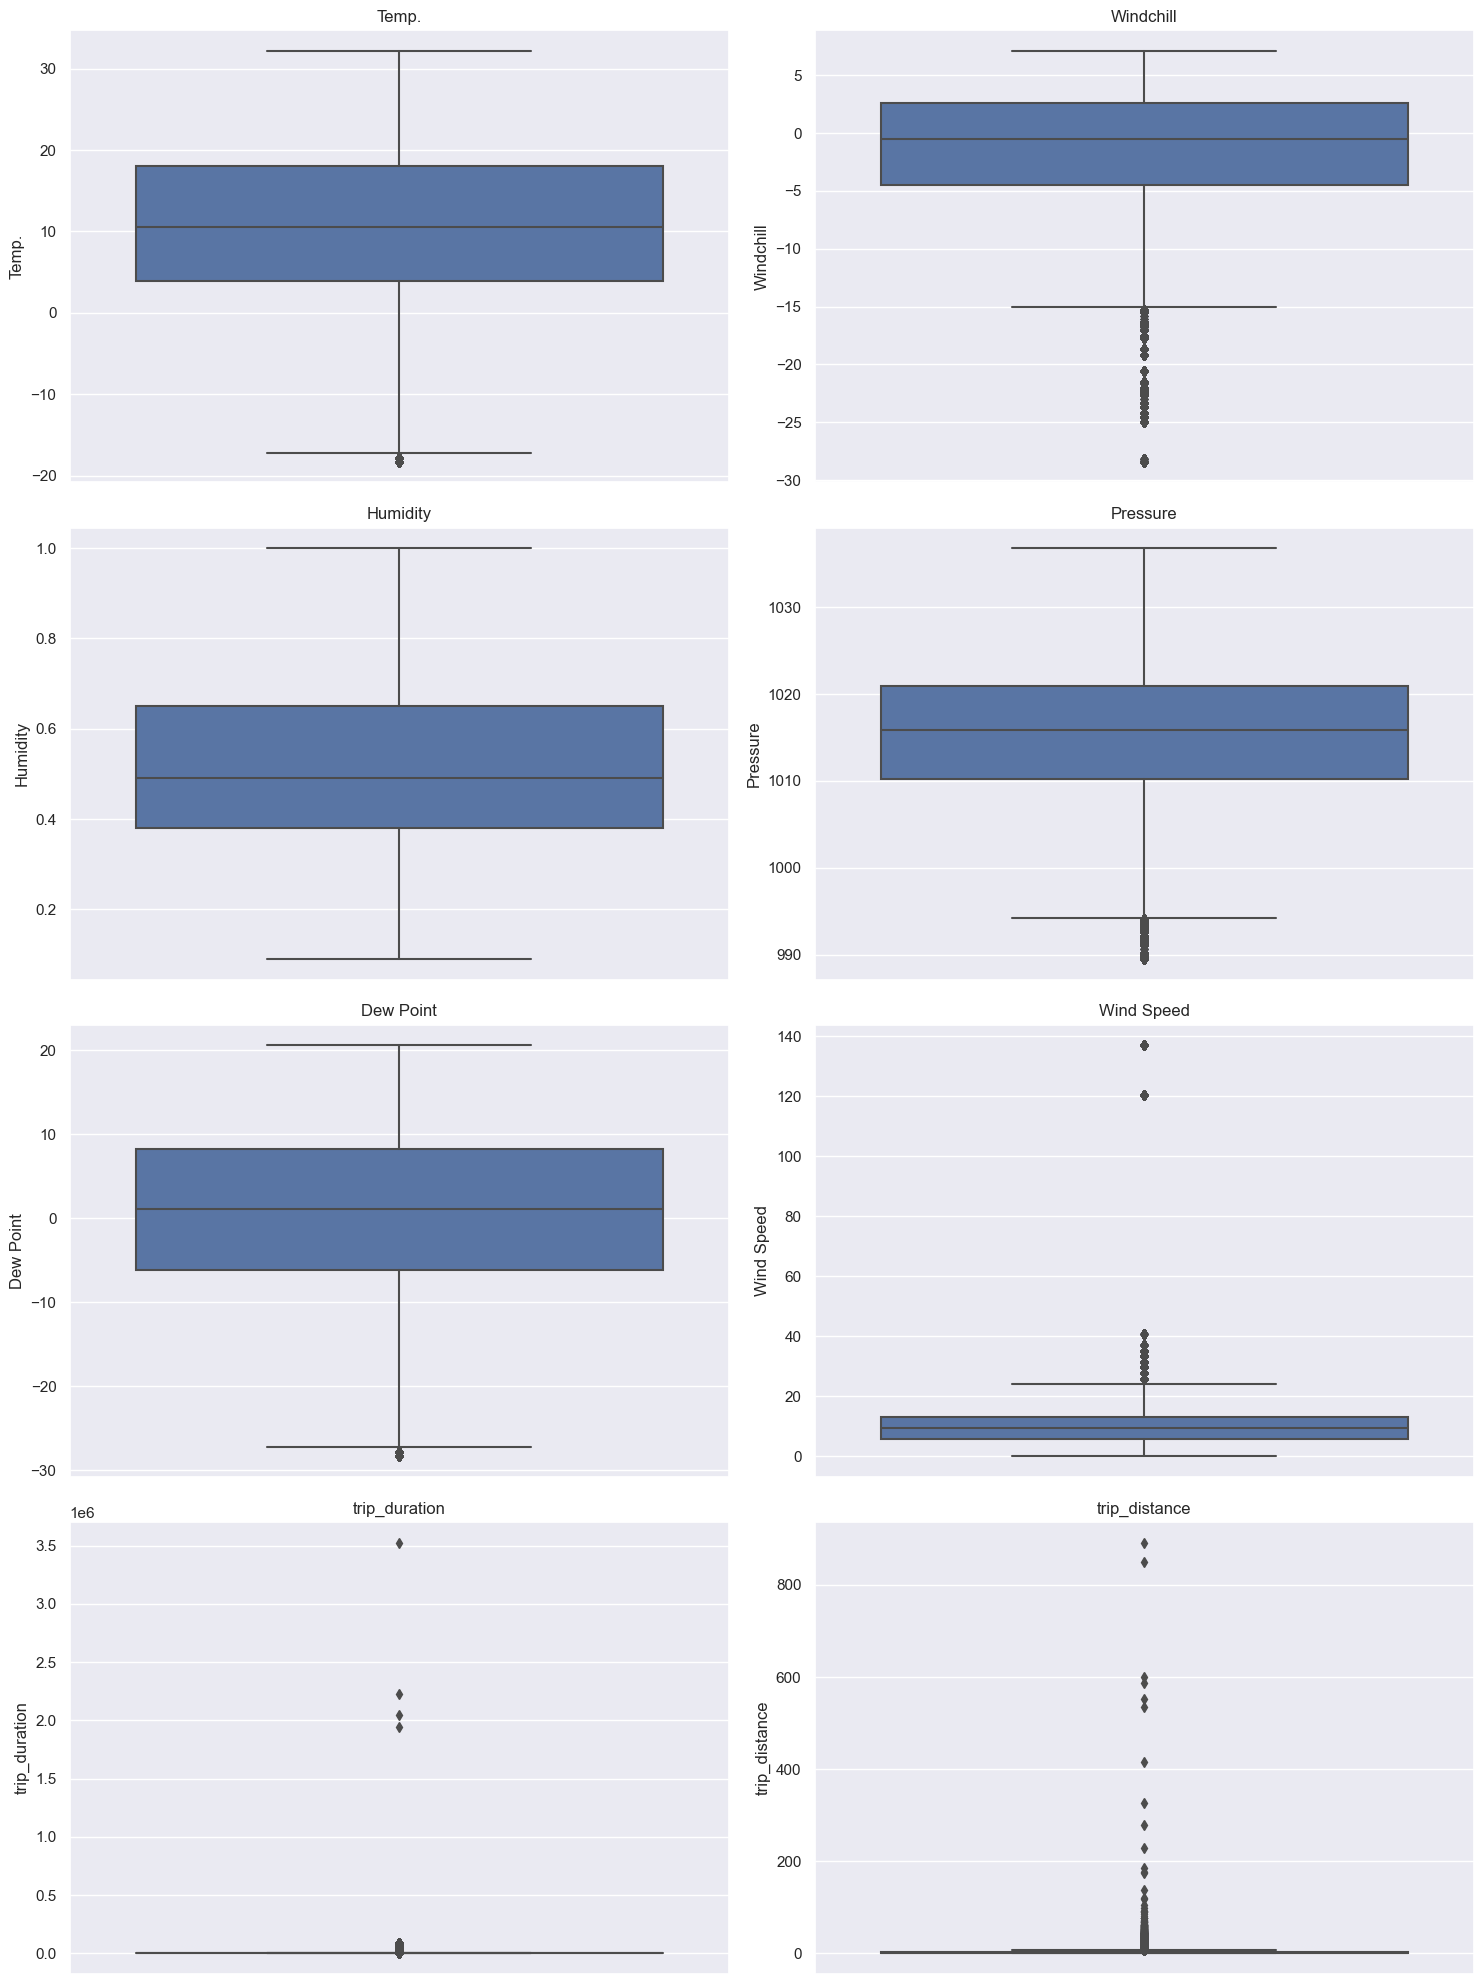

In [ ]:
fig, axes = plt.subplots(nrows= 4, ncols= 2, figsize=(15, 20))

axes = axes.flatten()

for i, column in tqdm(enumerate(['Temp.', 'Windchill', 'Humidity', 'Pressure', 'Dew Point', 'Wind Speed', 'trip_duration', 'trip_distance'])):
    axis = axes[i]
    sns.boxplot(data= df, y = column, ax= axis)
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'store_and_fwd_flag', 'trip_duration', 'trip_distance', 'Temp.',
       'Windchill', 'Humidity', 'Pressure', 'Dew Point', 'Visibility',
       'Wind Dir', 'Wind Speed', 'Gust Speed', 'Precip', 'Conditions'],
      dtype='object')

3it [00:00,  7.85it/s]


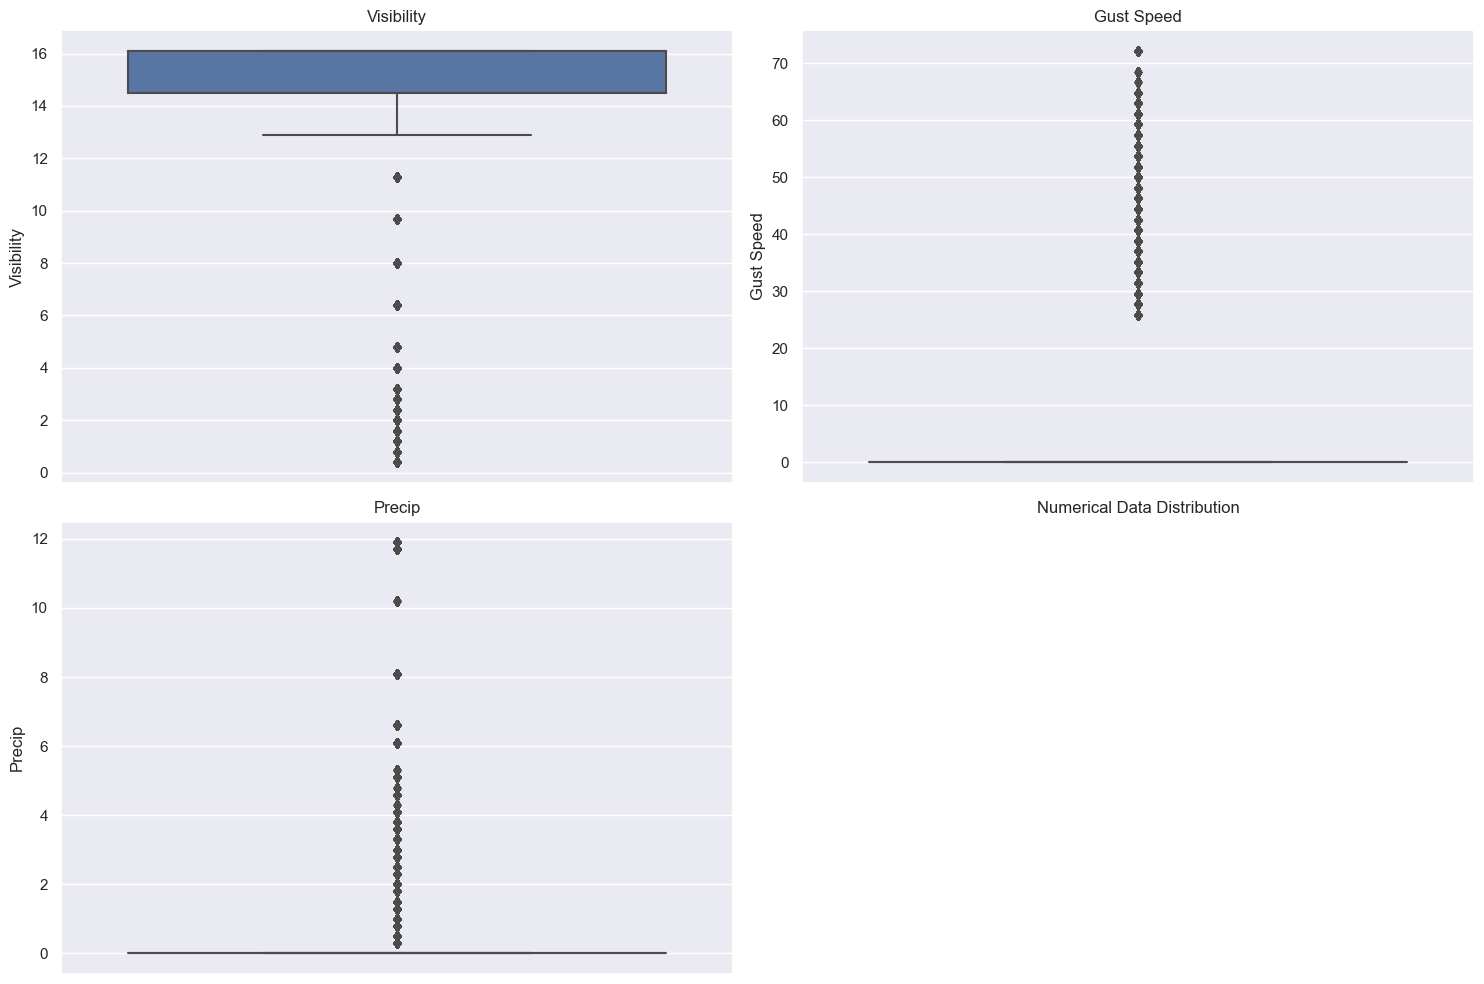

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

axes = axes.flatten()

for i, column in tqdm(enumerate(['Visibility','Gust Speed', 'Precip'])):
    axis = axes[i]
    sns.boxplot(data= df, y = column, ax= axis)
    axes[i].set_title(column)

plt.title("Numerical Data Distribution")
axes[3].set_axis_off()
plt.tight_layout()
plt.show()

 ##### Observations
 - ###### From here it is visible that the visibility and gust speed seems suspecious where 75% of the data lies under 0. So these columns don't contribute anything
 - ###### The data also have outliers which can be clearly observed from the boxplots
 - ###### We will drop visibility, gust speed and precipitation

In [ ]:
df.describe()

,passenger_count,trip_duration,trip_distance,Temp.,Windchill,Humidity,Pressure,Dew Point,Visibility,Wind Speed,Gust Speed,Precip
count,1458644.000,1458644.000,1458644.000,1446612.000,480744.000,1446612.000,1402613.000,1446612.000,1402047.000,1446612.000,1446612.000,1446612.000
mean,1.665,959.492,3.171,11.065,-1.532,0.521,1015.631,0.644,14.693,8.962,8.010,0.068
std,1.314,5237.432,4.124,9.137,5.777,0.191,7.996,9.890,3.101,7.216,15.132,0.463
min,0.000,1.000,0.000,-18.300,-28.400,0.090,989.500,-28.300,0.400,0.000,0.000,0.000
25%,1.000,397.000,1.112,3.900,-4.500,0.380,1010.200,-6.100,14.500,5.600,0.000,0.000
50%,1.000,662.000,1.892,10.600,-0.500,0.490,1015.900,1.100,16.100,9.300,0.000,0.000
75%,2.000,1075.000,3.488,18.000,2.600,0.650,1020.900,8.300,16.100,13.000,0.000,0.000
max,9.000,3526282.000,891.838,32.200,7.100,1.000,1036.800,20.600,16.100,137.000,72.200,11.900


In [ ]:
percentile_50 = df['trip_duration'].quantile(0.5)
percentile_75 = df['trip_duration'].quantile(0.75)
count_50_75 = df['trip_duration'].between(percentile_50, percentile_75).sum()
count_75 = df['trip_duration'].between(0, percentile_75).sum()

print("Number of data points between 50th and 75th percentile:", count_50_75)
print("Number of data points lie under 75th percentile:", count_75)

Number of data points between 50th and 75th percentile: 365894
Number of data points lie under 75th percentile: 1094153


In [ ]:
percentile_50 = df['trip_distance'].quantile(0.5)
percentile_75 = df['trip_distance'].quantile(0.75)
count_50_75 = df['trip_distance'].between(percentile_50, percentile_75).sum()
count_75 = df['trip_distance'].between(0, percentile_75).sum()

print("Number of data points between 50th and 75th percentile:", count_50_75)
print("Number of data points lie under 75th percentile:", count_75)

Number of data points between 50th and 75th percentile: 364665
Number of data points lie under 75th percentile: 1093984


In [ ]:
df.isna().sum()

pickup_datetime            0
dropoff_datetime           0
passenger_count            0
store_and_fwd_flag         0
trip_duration              0
trip_distance              0
Temp.                  12032
Windchill             977900
Humidity               12032
Pressure               56031
Dew Point              12032
Visibility             56597
Wind Dir               12032
Wind Speed             12032
Gust Speed             12032
Precip                 12032
Conditions             12032
dtype: int64

In [5]:
df = df[df['Temp.'] >= -18.300]
df['Temp.'] = df['Temp.'].fillna(df['Temp.'].median())

df = df[df['Windchill'] >= -15.000]
df['Windchill'] = df['Windchill'].fillna(df['Windchill'].median())

df['Humidity'] = df['Humidity'].fillna(df['Humidity'].median())

df = df[df['Pressure'] >= 995]
df['Pressure'] = df['Pressure'].fillna(df['Pressure'].median())

df = df[df['Dew Point'] >= -28.000]
df['Dew Point'] = df['Dew Point'].fillna(df['Dew Point'].median())

df = df[df['Wind Speed'] <= 20]
df['Wind Speed'] = df['Wind Speed'].fillna(df['Wind Speed'].median())

In [6]:
df['month'] = pd.to_datetime(df['pickup_datetime']).dt.month
df['day'] = pd.to_datetime(df['pickup_datetime']).dt.day_of_week

In [7]:
df.drop(['pickup_datetime', 'dropoff_datetime', 'passenger_count', 'Gust Speed', 'Precip', 'Visibility', 'store_and_fwd_flag'], axis =1 , inplace = True)

In [8]:
df['trip_distance'] = df['trip_distance'].apply(lambda x: x * 1.60934)
df['trip_duration'] = df['trip_duration'].apply(lambda x: x / 60)

In [9]:
dist_scale = StandardScaler()
df['trip_distance'] = dist_scale.fit_transform(np.array(df['trip_distance']).reshape(-1, 1))
temp_scale = StandardScaler()
df['Temp.'] = temp_scale.fit_transform(np.array(df['Temp.']).reshape(-1, 1))
windchill_scale = StandardScaler()
df['Windchill'] = windchill_scale.fit_transform(np.array(df['Windchill']).reshape(-1, 1))
humid_scale = StandardScaler()
df['Humidity'] = humid_scale.fit_transform(np.array(df['Humidity']).reshape(-1, 1))
press_scale = StandardScaler()
df['Pressure'] = press_scale.fit_transform(np.array(df['Pressure']).reshape(-1, 1))
dewpoint_scale = StandardScaler()
df['Dew Point'] = dewpoint_scale.fit_transform(np.array(df['Dew Point']).reshape(-1, 1))

In [10]:
df['Wind Dir'].unique()

array(['SW', 'Variable', 'ENE', 'West', 'East', 'WNW', 'NW', 'ESE', 'WSW',
       'NE', 'SSE', 'South', 'SE', 'North', 'SSW', 'NNE', 'NNW'],
      dtype=object)

In [11]:
wind_dir_dict = {'East' : 0,
                 'ENE' : 0, 
                 'ESE' : 0, 
                 
                 'West' : 1, 
                 'WSW' : 1,
                 'WNW' : 1,
                 
                 'South' : 2, 
                 'SSE' : 2,   
                 'SSW' : 2,
                 
                 'North' : 3, 
                 'NNE' : 3, 
                 'NNW' : 3,
                 
                 'Variable' : 4, 
                 'Calm' : 5, 
                 'SW' : 6, 
                 'NW' : 6, 
                 'NE' : 6, 
                 'SE' : 6, 
                 'Unknown' : 7
                }
df["Wind Dir"] = df["Wind Dir"].fillna('Unknown')
df["Wind Dir"] = df["Wind Dir"].apply(lambda x: wind_dir_dict[x]) 

In [12]:
df['Conditions'].unique()

array(['Clear', 'Overcast', 'Mostly Cloudy', 'Light Snow',
       'Partly Cloudy', 'Heavy Rain', 'Haze', 'Snow', 'Light Rain',
       'Scattered Clouds', 'Rain', 'Light Freezing Rain',
       'Light Freezing Fog'], dtype=object)

In [13]:
weather_dict = {'Overcast' : 0, 
                'Haze' : 0,
                'Partly Cloudy' : 0, 
                'Mostly Cloudy' : 0, 
                'Scattered Clouds' : 0, 
                'Light Freezing Fog' : 0,
                
                'Unknown' : 1,
                'Clear' : 2, 
                
                'Heavy Rain' : 3, 
                'Rain' : 3, 
                'Light Freezing Rain' : 3,
                'Light Rain' : 3, 
                
                'Heavy Snow' : 4,
                'Light Snow' : 4,
                'Snow' : 4}

df["Conditions"] = df["Conditions"].fillna('Unknown')
df["Conditions"] = df["Conditions"].apply(lambda x: weather_dict[x]) 

In [14]:
cat_col = {'Conditions':str, 'day':str, 'month':str, 'Wind Dir':str}
df = df.astype(cat_col)
cat_col = ['Conditions', 'day', 'month', 'Wind Dir']
dummies = pd.get_dummies(data = df[cat_col]).astype(int)
ddf = pd.concat([df, dummies], axis=1)
ddf.drop(cat_col, axis=1, inplace=True)

In [48]:
ddf.head()

,trip_duration,trip_distance,Temp.,Windchill,Humidity,Pressure,Dew Point,Wind Speed,Conditions_0,Conditions_2,Conditions_3,Conditions_4,day_0,day_1,day_2,day_3,day_4,day_5,day_6,month_1,month_2,month_3,month_4,month_5,Wind Dir_0,Wind Dir_1,Wind Dir_2,Wind Dir_3,Wind Dir_4,Wind Dir_6
5,7.383,-0.480,0.415,0.187,-0.580,-0.232,-0.109,16.700,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
12,18.567,-0.325,-1.314,-1.063,-0.872,2.271,-1.342,7.400,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
17,12.183,-0.285,1.215,0.979,-0.288,1.177,0.570,16.700,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
20,8.100,-0.154,0.415,0.187,-0.346,-0.358,0.065,16.700,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
22,7.050,-0.399,0.415,0.562,-0.346,-1.213,0.065,7.400,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


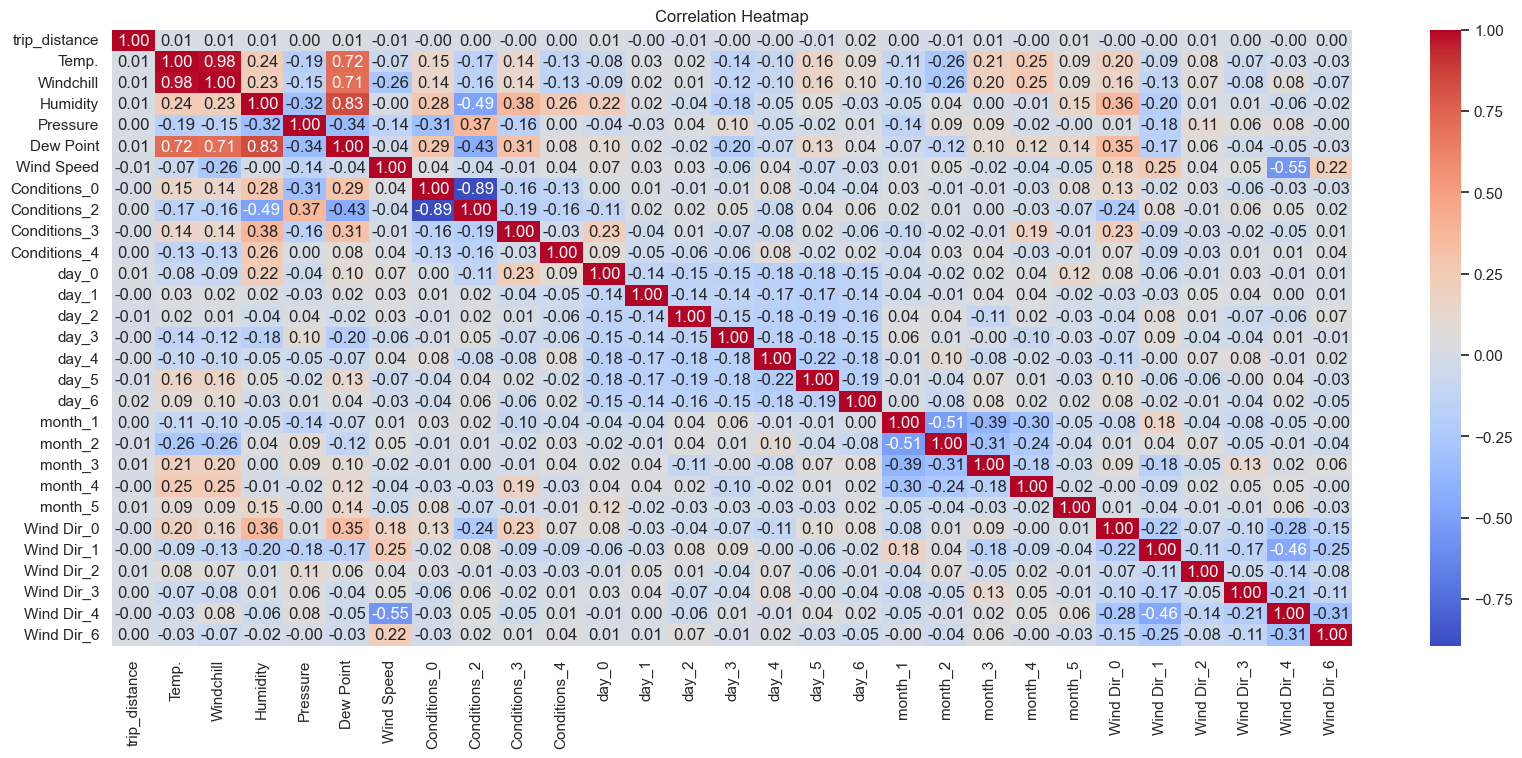

In [15]:
correlation_matrix = ddf.drop(['trip_duration'], axis = 1).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [16]:
threshold = 0.8  

correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

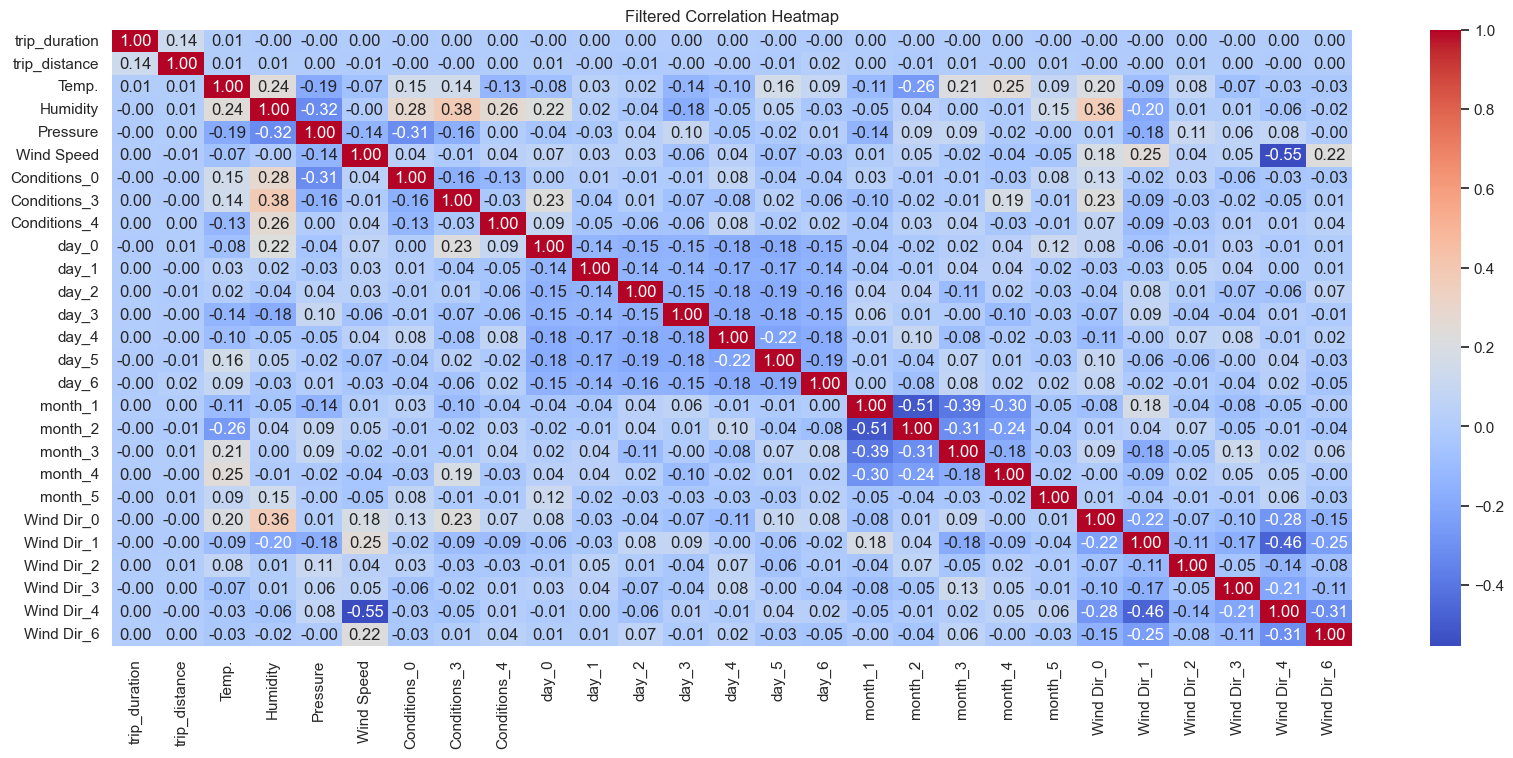

In [17]:
ddf_filtered = ddf.drop(correlated_features, axis=1)
plt.figure(figsize=(20, 8))
sns.heatmap(ddf_filtered.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Filtered Correlation Heatmap')
plt.show()

In [61]:
print("Actual number of columns ",len(ddf.columns))
print("Remaining columns after removing correlated features ", len(ddf_filtered.columns))

Actual number of columns  30
Remaining columns after removing correlated features  27


In [16]:
X = ddf_filtered.drop('trip_duration', axis=1)
y = ddf_filtered['trip_duration']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.25)

In [17]:
dl_selector = SelectFromModel(estimator=DecisionTreeRegressor(), threshold='median')
dl_selector.fit(x_train, y_train)
importance = dl_selector.estimator_.feature_importances_ if hasattr(dl_selector.estimator_, 'feature_importances_') else np.abs(dl_selector.estimator_.predict(x_test))
feature_names = x_train.columns[dl_selector.get_support()]
top_5_indices = np.argsort(importance)[::-1][:5]
top_5_features = feature_names[top_5_indices]
top_5_importance = importance[top_5_indices]
print(list(zip(top_5_features, top_5_importance)))

[('trip_distance', 0.7553483567341873), ('Pressure', 0.0494229032819329), ('Humidity', 0.03805836830127956), ('Temp.', 0.03566986553308991), ('Wind Speed', 0.025003802537318973)]


In [18]:
rf_selector = SelectFromModel(estimator=RandomForestRegressor(n_estimators=10), threshold='median')
rf_selector.fit(x_train, y_train)
importance = rf_selector.estimator_.feature_importances_ if hasattr(rf_selector.estimator_, 'feature_importances_') else np.abs(rf_selector.estimator_.predict(x_test))
feature_names = x_train.columns[rf_selector.get_support()]
top_5_indices = np.argsort(importance)[::-1][:5]
top_5_features = feature_names[top_5_indices]
top_5_importance = importance[top_5_indices]
print(list(zip(top_5_features, top_5_importance)))

[('trip_distance', 0.7335103955401964), ('Pressure', 0.06365090230402012), ('Humidity', 0.03678621841652631), ('Temp.', 0.03539600560274457), ('Wind Speed', 0.024591717193218354)]


In [ ]:
ddf_filtered.to_csv('filtered.csv', index = False)